<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

<b> Submitted by : Amritangshu Mukherjee -(am222239) and Apurva Audi -(aa85254)

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 

(a) A point estimator's bias can be defined as the difference between its expected value and the value of the parameter it is estimating, whereas Model bias refers to the systematic assumptions made by the model to simplify the target function.As a result the model bias can be refered to as the difference between the average prediction of our model and the correct value which we are trying to predict.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------

(b) Learning curves show performance of a model as a function of training size on fixed set of hyperparameters. A plot of learning curves (at a given sample size) shows overfitting if the observed train error curve illustrates a smaller error as compared to the validation error. The train error increases with the increase in data set keeps increasing, whereas the plot of the observed validation error curve decreases to a certain level. At the steady state, there will still be a large gap between training and validation errors.

If the model is underfitting (high bias), then the observed train error keeps increasing as we obtain more and more data until it is steady or decreases at some sample dataset size. The validation error keeps reducing and plateaus at a level . Here the training and validation error might be relatively closer to each other with validation error mostly a little higher than the training error.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------

# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data_load = np.load('/Users/amritangshumukherjee/Downloads/MIS 382N - Advanced machine learning/HW2/data.npy', allow_pickle = True)

In [3]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

### (a) ----------------------------------------------------------------------------

In [4]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of rees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

#degree 2----------------------------------------------------------------------------------------------------------
    x_train_2 = np.vander(np.squeeze(x_train), 3)
    x_test_2 = np.vander(np.squeeze(x_test), 3)
    lin_reg_2=LinearRegression()
    lin_reg_2.fit(x_train_2, y_train)
    mse_train_2 = mean_squared_error(y_train, lin_reg_2.predict(x_train_2))
    mse_test_2 = mean_squared_error(y_test, lin_reg_2.predict(x_test_2))

    y_all_pred_2 = lin_reg_2.predict(np.vander(np.squeeze(x_all), 3))
    print('Train MSE for 2 deg Polynomial Regression=>',mse_train_2)
    print('Validation MSE for 2 deg Polynomial Regression=>',mse_test_2)
#degree 4----------------------------------------------------------------------------------------------------------
    x_train_4 = np.vander(np.squeeze(x_train), 5)
    x_test_4 = np.vander(np.squeeze(x_test), 5)
    lin_reg_4=LinearRegression()
    lin_reg_4.fit(x_train_4, y_train)
    mse_train_4 = mean_squared_error(y_train, lin_reg_4.predict(x_train_4))
    mse_test_4 = mean_squared_error(y_test, lin_reg_4.predict(x_test_4))

    y_all_pred_4 = lin_reg_4.predict(np.vander(np.squeeze(x_all), 5))
    print('Train MSE for 4 deg Polynomial Regression=>',mse_train_4)
    print('Validation MSE for 4 deg Polynomial Regression=>',mse_test_4)
#degree 7----------------------------------------------------------------------------------------------------------
    x_train_7 = np.vander(np.squeeze(x_train), 8)
    x_test_7 = np.vander(np.squeeze(x_test), 8)
    lin_reg_7=LinearRegression()
    lin_reg_7.fit(x_train_7, y_train)
    mse_train_7 = mean_squared_error(y_train, lin_reg_7.predict(x_train_7))
    mse_test_7 = mean_squared_error(y_test, lin_reg_7.predict(x_test_7))

    y_all_pred_7 = lin_reg_7.predict(np.vander(np.squeeze(x_all), 8))
    print('Train MSE for 7 deg Polynomial Regression=>',mse_train_7)
    print('Validation MSE for 7 deg Polynomial Regression=>',mse_test_7)
#plotting predictions---------------------------------------------------------------------------------------------

    plt.figure(figsize=(15,8))
    plt.scatter(x_test,lin_reg_2.predict(x_test_2),s=15, label='X test Prediction degree 2')
    plt.scatter(x_test, lin_reg_4.predict(x_test_4),s=15, label='X test Prediction degree 4')
    plt.scatter(x_test, lin_reg_7.predict(x_test_7),s=15, label='X test Prediction degree 7')  
    plt.plot(x_all, y_all_pred_2, label='X all Prediction degree 2')
    plt.plot(x_all, y_all_pred_4, label='X all Prediction degree 4')
    plt.plot(x_all,y_all_pred_7,  label='X all Prediction degree 7')    
    plt.scatter(x_train,y_train,s=15,label='xtrain vs ytrain')
    plt.scatter(x_test,y_test,s=15,label='xtest vs ytest')
    plt.legend()
    plt.xlim([-5,5])
    plt.ylim([-200,200])
 
    return [mse_train_2, mse_train_4, mse_train_7], [mse_test_2, mse_test_4, mse_test_7]


Train MSE for 2 deg Polynomial Regression=> 247.29679797371534
Validation MSE for 2 deg Polynomial Regression=> 320.06408346977855
Train MSE for 4 deg Polynomial Regression=> 31.72001805729006
Validation MSE for 4 deg Polynomial Regression=> 31.29208288660674
Train MSE for 7 deg Polynomial Regression=> 30.67719359210973
Validation MSE for 7 deg Polynomial Regression=> 33.410694077690025


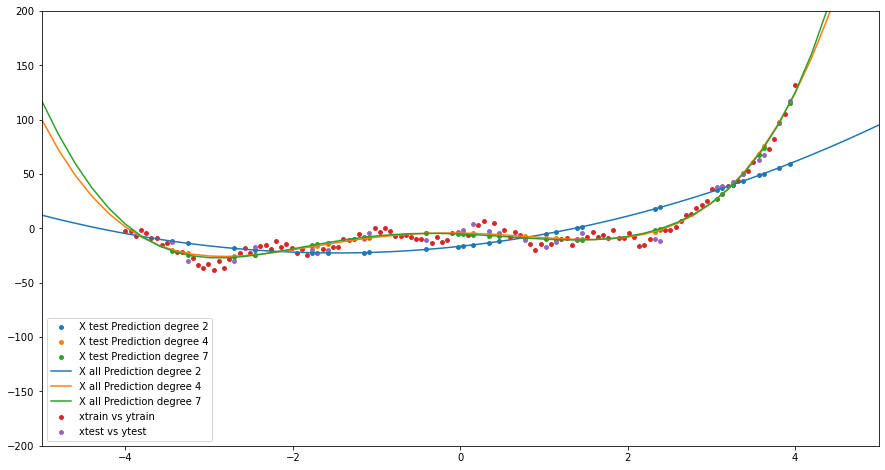

In [5]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

### (b) ----------------------------------------------------------------------------

If our model is too simple similar to the polynomial of degree 2 and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters like the polynomial of degree 7 then it’s going to have high variance and low bias. In our case we would prefer the polynomial of degree 4 as it is a good balance between bias and variance and manges to fit the data well enough but avoid overfitting.


### (c) ----------------------------------------------------------------------------

20% data
Train MSE for 2 deg Polynomial Regression=> 161.17147378830037
Validation MSE for 2 deg Polynomial Regression=> 402.32312690992865
Train MSE for 4 deg Polynomial Regression=> 35.1151131391298
Validation MSE for 4 deg Polynomial Regression=> 38.3407449834428
Train MSE for 7 deg Polynomial Regression=> 22.543946691373332
Validation MSE for 7 deg Polynomial Regression=> 135.20764526756463
40% data
Train MSE for 2 deg Polynomial Regression=> 150.332512860857
Validation MSE for 2 deg Polynomial Regression=> 405.80516696165745
Train MSE for 4 deg Polynomial Regression=> 31.62452964644691
Validation MSE for 4 deg Polynomial Regression=> 33.164282959187425
Train MSE for 7 deg Polynomial Regression=> 25.492718751653616
Validation MSE for 7 deg Polynomial Regression=> 61.23741884551077
60% data
Train MSE for 2 deg Polynomial Regression=> 150.08383759141728
Validation MSE for 2 deg Polynomial Regression=> 403.2513784833407
Train MSE for 4 deg Polynomial Regression=> 29.192805739947897
Va

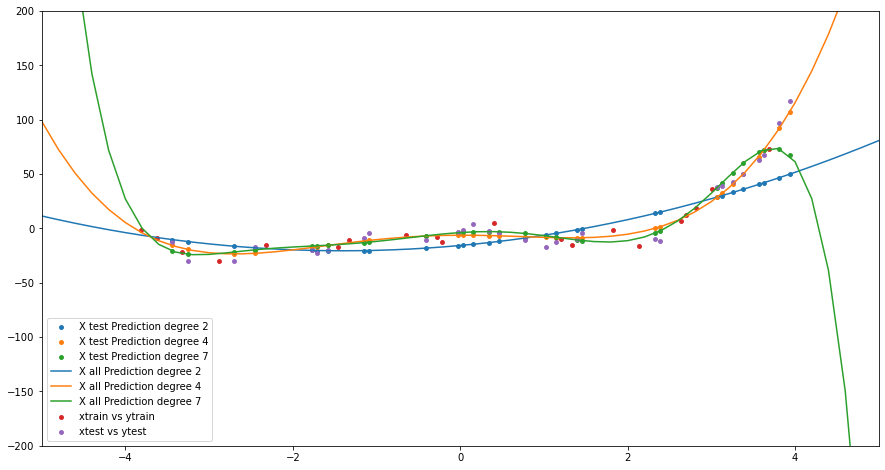

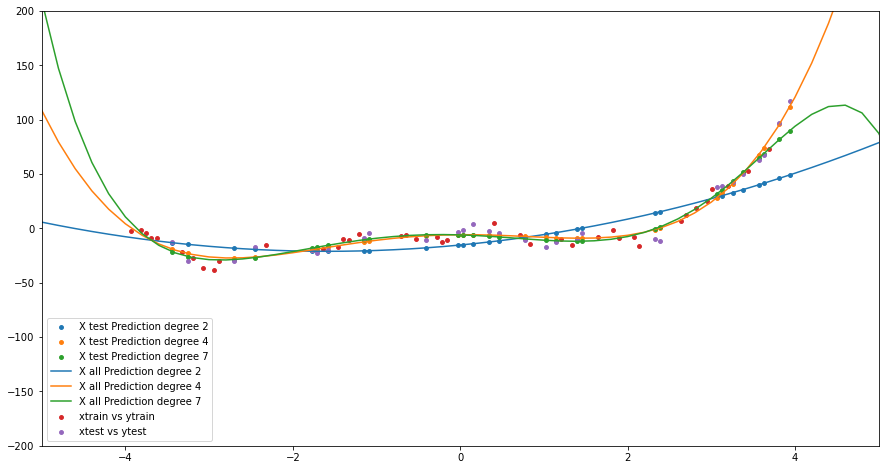

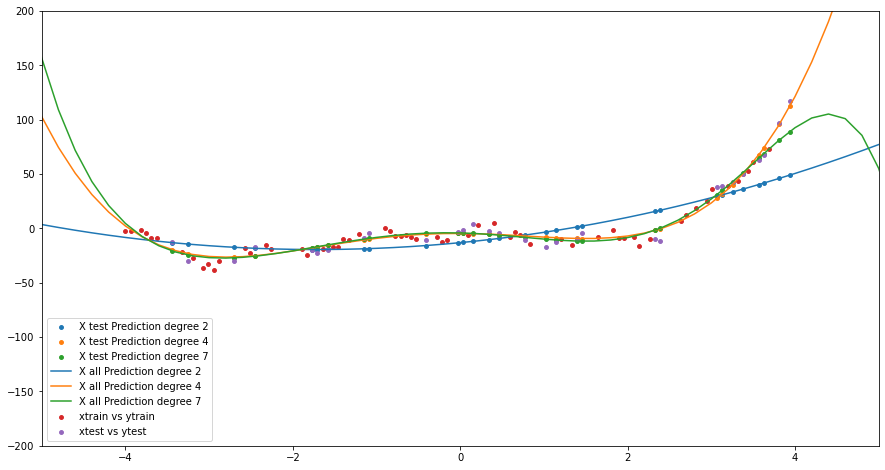

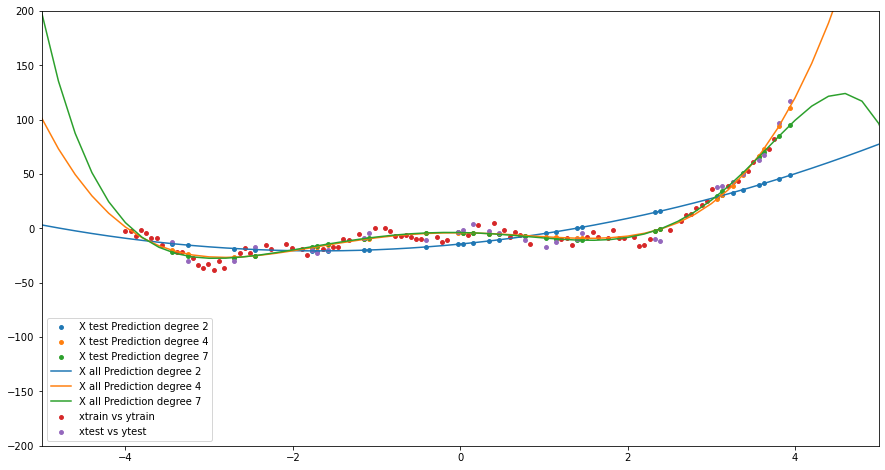

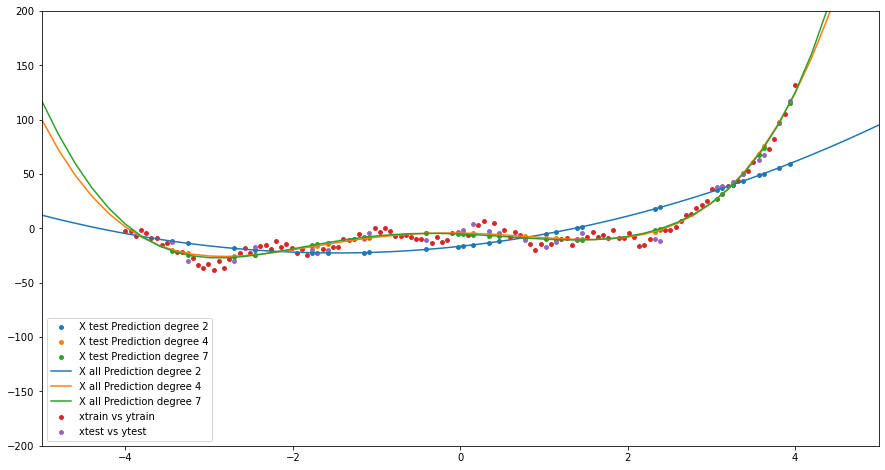

In [6]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

# Answer : 

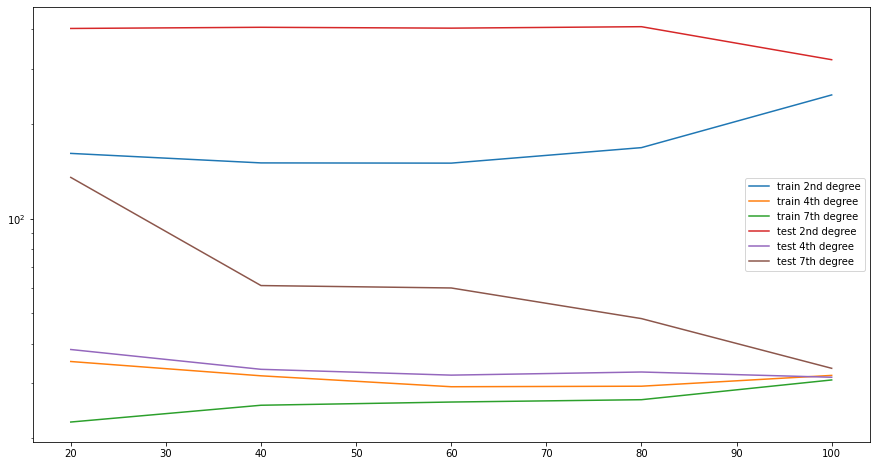

In [7]:
x=[20,40,60,80,100]
y2=[train_rmses_20[0],train_rmses_40[0],train_rmses_60[0],train_rmses_80[0],train_rmses_100[0]]
y4=[train_rmses_20[1],train_rmses_40[1],train_rmses_60[1],train_rmses_80[1],train_rmses_100[1]]
y7=[train_rmses_20[2],train_rmses_40[2],train_rmses_60[2],train_rmses_80[2],train_rmses_100[2]]

y2_t=[test_rmses_20[0],test_rmses_40[0],test_rmses_60[0],test_rmses_80[0],test_rmses_100[0]]
y4_t=[test_rmses_20[1],test_rmses_40[1],test_rmses_60[1],test_rmses_80[1],test_rmses_100[1]]
y7_t=[test_rmses_20[2],test_rmses_40[2],test_rmses_60[2],test_rmses_80[2],test_rmses_100[2]]

plt.figure(figsize=(15,8))
plt.yscale('log') 
plt.plot(x,y2,label='train 2nd degree')
plt.plot(x,y4,label='train 4th degree')
plt.plot(x,y7,label='train 7th degree')
plt.plot(x,y2_t,label='test 2nd degree')
plt.plot(x,y4_t,label='test 4th degree')
plt.plot(x,y7_t,label='test 7th degree')
plt.legend()
plt.show()

we can observe that the MSE generally goes down when we have more data across all the polynomial models and with both test and train MSEs. As we increase the size of the training data, the bias would increase while the variance would decrease.We observe the maximum error when we have 20 percent of the data available.

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 


# Answer : 

(1) In gradient descent with momentum, small steps are taken where gradients oscillate, while large steps are taken along the same direction as the past gradients. As a result of this, the convergence of the loss function is faster as it takes past gradients into account to make adjustments. It enables our algorithm to take a straighter forward path to local optima and to damp out vertical oscillations. Because of this the algorithm will end up with a few iterations at local optima.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------


(2) Mini-batch Stochastic Gradient Descent is more computationally better as batching allows for both efficient training data handling and algorithm implementation. For each and every dataset, we are controlling memory consumption and storing losses. Additionally we dont have to wait for entire dataset and just passing a smaller subset.

#### -----------------------------------------------------------------------------------------------------------------------------------------------------


# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

# Answer :

#### 1) -----------------------------------------------------------------------------------------------------------------------------------------------

The model equation is below -

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 

if we try to calculate the sum of squared residuals using below simplified equation
$$
\begin{equation}
\nonumber \left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)^2
\end{equation}
$$
------------------------------------------------------------------------------------------------------------
$$ Derivative - using - w_0 $$
$$
\begin{equation}
\nonumber -2\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)
\end{equation}
$$

$$
\begin{equation}
\nonumber Updated-w_0 =(learning-rate)* (-2\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right))
\end{equation}
$$

------------------------------------------------------------------------------------------------------------

$$ Derivative - using - w_1 $$
$$
\begin{equation}
\nonumber -2\mathrm{e}^{-x_1}\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)
\end{equation}
$$

$$
\begin{equation}
\nonumber Updated-w_1 =(learning-rate)* \left(-2\mathrm{e}^{-x_1}\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)\right)
\end{equation}
$$

------------------------------------------------------------------------------------------------------------
$$ Derivative - using - w_2 $$
$$
\begin{equation}
\nonumber -2x_1\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)
\end{equation}
$$

$$
\begin{equation}
\nonumber Updated-w_2 =(learning-rate)* \left(-2x_1\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)\right)
\end{equation}
$$

------------------------------------------------------------------------------------------------------------
$$ Derivative - using - w_3 $$
$$
\begin{equation}
\nonumber -2x_1x_2\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)
\end{equation}
$$

$$
\begin{equation}
\nonumber Updated-w_3 =(learning-rate)* \left(-2x_1x_2\cdot\left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)\right)
\end{equation}
$$

------------------------------------------------------------------------------------------------------------

If we consider regularization we have an additional term for regularization

$$
\begin{equation}
\nonumber \left(y-w_0-w_1\mathrm{e}^{-x_1}-w_2x_1-w_3x_1x_2\right)^2 + \alpha * (w_0^2+w_1^2+w_2^2+w_3^3)
\end{equation}
$$

All the updated weight terms will just have an additional $$ 2*\alpha*w term $$

#### 2(a) -----------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        self.coef[0] = 0.01
        self.coef[1] = 0.01
        self.coef[2] = 0.01
        self.coef[3] = 0.01
        
    def sgd(self, gradient):
        #print(gradient)
        #self.coef[0] = self.coef[0]+self.learning_rate*gradient[0]-2*self.regularization*self.coef[0]
        self.coef=self.coef+self.learning_rate*gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            #coefs.append(self.coef)
            for i in range(X.shape[0]):
                # Compute error
                y_pred = X[i]*self.coef
                loss=y[i]-np.matmul(X[i],self.coef.transpose())
                

                # Compute gradients
                #gradient[0] = np.dot(2*X[i,0], (y[i] - y_pred_sum))
                gradient=loss * X[i] - self.regularization * self.coef
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            
        return self.lowest_mse

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
        #compute the dot product of self.coef and X
        #np.dot(X, self)
        return np.dot(X, self.coef) #this line is just a placeholder, please delete this line in your code        

In [9]:
data = pd.read_csv('/Users/amritangshumukherjee/Downloads/MIS 382N - Advanced machine learning/HW2/SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [10]:
#testing for best MSE
import warnings
warnings.filterwarnings("ignore")
dataframe = pd.DataFrame(columns = ['rate','alpha','MSE']) 
ridge_mse_list=[] 
for rate in learning_rate:
    for alpha in regularization:
        #print(rate,alpha)
        lr=Regression(rate,alpha,n_epochs)
        ridge_mse=lr.fit(X, y,plot=False)
        dataframe.loc[len(dataframe)] = [rate,alpha,ridge_mse]

best_combination=dataframe.sort_values(by='MSE')[:2]
best_combination

,rate,alpha,MSE
6,0.010,0.0,0.027390
3,0.001,0.0,0.030509


The Best combination of learning rate and alpha is 0.01 0.0
----------------------------------------------------------------------------------
The second best combination of learning rate and alpha is 0.001 0.0


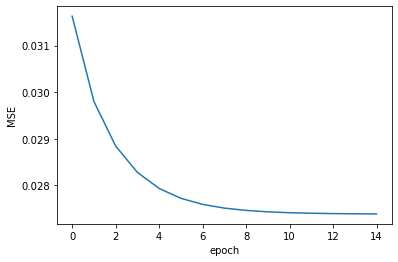

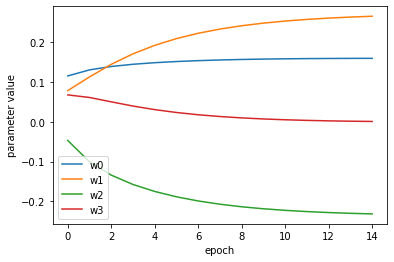

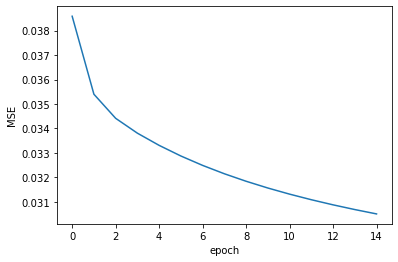

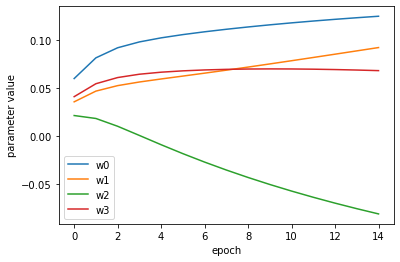

In [11]:
print('The Best combination of learning rate and alpha is',best_combination['rate'].iloc[0],best_combination['alpha'].iloc[0])
#The best combination
lr=Regression(best_combination['rate'].iloc[0],best_combination['alpha'].iloc[0],n_epochs)
ridge_mse=lr.fit(X, y,plot=True)

print('----------------------------------------------------------------------------------')


#The second best combination
lr=Regression(best_combination['rate'].iloc[1],best_combination['alpha'].iloc[1],n_epochs)
ridge_mse=lr.fit(X, y,plot=True)
print('The second best combination of learning rate and alpha is',best_combination['rate'].iloc[1],best_combination['alpha'].iloc[1])

#### 2(b) -----------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
print('The MSE of the two best combinations of learning rate and regularization constant')
best_combination

The MSE of the two best combinations of learning rate and regularization constant


,rate,alpha,MSE
6,0.010,0.0,0.027390
3,0.001,0.0,0.030509
